# Machine Learning Algorithm - Simple Linear Regression

###### Declare all relavant header files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

###### Load the Data-set into Data-Frame

In [2]:
df = pd.read_csv('./DataSet/Salary_Data.csv')

###### Print the first 5 rows to check if Data-Set has loaded properly

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


###### Print the last 5 rows to check if Data-Set has loaded properly

In [4]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


###### Print information of data frame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


###### To perform descriptive statistics 

In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


###### Defining Dependent and Indepenedent Variables

In [7]:
x = df['YearsExperience']
Y = df['Salary']

###### Visualising Data using Scatter-Plot

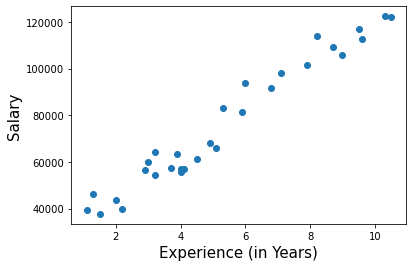

In [8]:
# Plot a scatter (first we put horizontal axis and then vertical axis)
plt.scatter(x,Y)

# Name the axes
plt.xlabel('Experience (in Years)', fontsize = 15)
plt.ylabel('Salary', fontsize = 15)

# Show the plot
plt.show()

###### Use add_constant() : Add a column of ones to an array

In [9]:
X = sm.add_constant(x)
X.head()
# It is required(mandatory) for model - ordinary mean square method

C:\Users\Parth\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,YearsExperience
0,1.0,1.1
1,1.0,1.3
2,1.0,1.5
3,1.0,2.0
4,1.0,2.2


###### To Split Data-Frame to Test & Train

In [10]:
# Training: 80% & Testing: 20%
# random_size is just seed value or starting value for randomization
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,train_size=0.8,random_state=42)
# if you use random_state=some_number, then you can guarantee that the output of Run 1 will be equal to the output of Run 2

###### OLS Function

In [11]:
mba_lm = sm.OLS(train_Y,train_X).fit()

In [12]:
train_X

,const,YearsExperience
28,1.0,10.3
24,1.0,8.7
12,1.0,4.0
0,1.0,1.1
4,1.0,2.2
16,1.0,5.1
5,1.0,2.9
13,1.0,4.1
11,1.0,4.0
22,1.0,7.9


In [13]:
print(mba_lm.params)

const              25321.583012
YearsExperience     9423.815323
dtype: float64


In [14]:
pred_Y = mba_lm.predict(test_X)

###### Now we calculate r2_score value

In [15]:
np.abs(r2_score(test_Y,pred_Y))

0.9024461774180498

###### We have obtained Coefficient Of Determination : r2_score = 0.9024461774180498

In [16]:
mba_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     598.4
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           1.91e-17
Time:                        22:13:58   Log-Likelihood:                -239.44
No. Observations:                  24   AIC:                             482.9
Df Residuals:                      22   BIC:                             485.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.532e+04   2285.938     11.077      0.000    2.06e+04    3.01e+04
YearsExperience  9423.8153    385.233     24.463      0.000    8624.891    1.02e+04
==============================================================================
Omnibus:                        0.647   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.724   Jarque-Bera (JB):                0.697
Skew:                           0.323   Prob(JB):                        0.706
Kurtosis:                       2.472   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Visualising Data using Linear Regression using Scatter-Plot

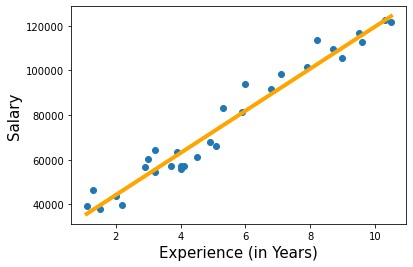

In [17]:
# Create a Scatter Plot
plt.scatter(x,Y)

# Define Regression equation
y_hat = 9423.8153*x+ 2.532e+04

# Plot the Regression Equation against Independent Variable('YearsExperience')
fig = plt.plot(x, y_hat, lw= 4, c = 'orange', label = 'Regression Line')

# Name the axes
plt.xlabel('Experience (in Years)', fontsize = 15)
plt.ylabel('Salary', fontsize = 15)

# Show the plot
plt.show()